# Packages

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFECV
from sklearn.model_selection import learning_curve

print('Packages imported...')


Packages imported...


## Dataset

In [24]:
df = pd.read_csv(r"C:\Users\Abdullah\Desktop\Gproject\HeartAttackML-main\HeartAttackML-main\Model_datasets\heart.csv")
X = df.drop(['output'],axis=1)
y = df[['output']]

## Preprocessing: Understanding the data

### The shape of the data

In [25]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (1025, 14)


### Preview of the first 5 rows of the data

In [26]:
df.head() #we can show more than 5 by write the number inside the brackets

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Checking the number of unique values in each column

In [27]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


### Separating the columns (features) into categorical and continuous

In [28]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


### Missing values

In [29]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trtbps    1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalachh  1025 non-null   int64  
 8   exng      1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slp       1025 non-null   int64  
 11  caa       1025 non-null   int64  
 12  thall     1025 non-null   int64  
 13  output    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Target Analysis

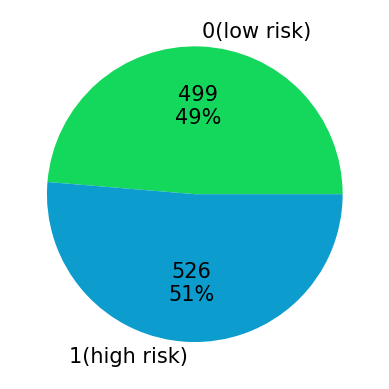

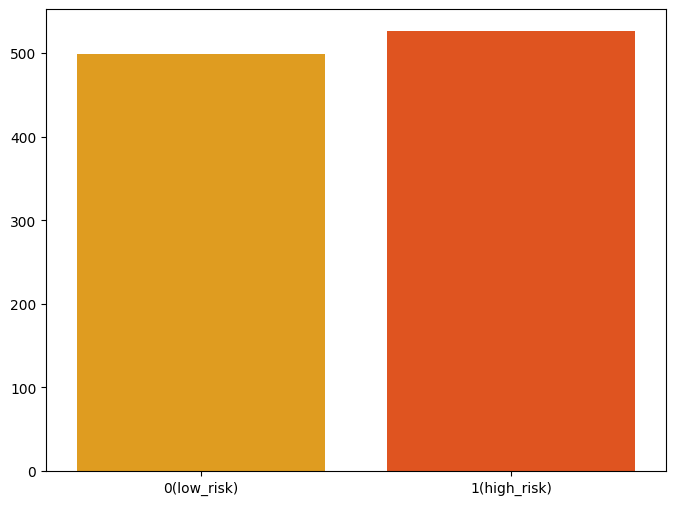

In [30]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
labels = ["0(low risk)","1(high risk)"]
df.groupby('output').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 15}, colors=['#14D85B','#0C9CCE'],labels=labels)
plt.show()
counts = df["output"].value_counts().sort_values()
diag_cols = ["0(low_risk)", "1(high_risk)"]

diag_counts = [counts[0], counts[1]]

plt.figure(figsize = (8, 6))
clrs = ['#FFA500' if (x < max(diag_counts)) else '#FF4500' for x in diag_counts ]
sns.barplot(x = diag_cols, y = diag_counts, palette=clrs) #delete the comment sign to see the barplot for the target
plt.show()

# Exploratory Data Analysis (EDA)

### Univariate Analysis

Count plot of categorical features

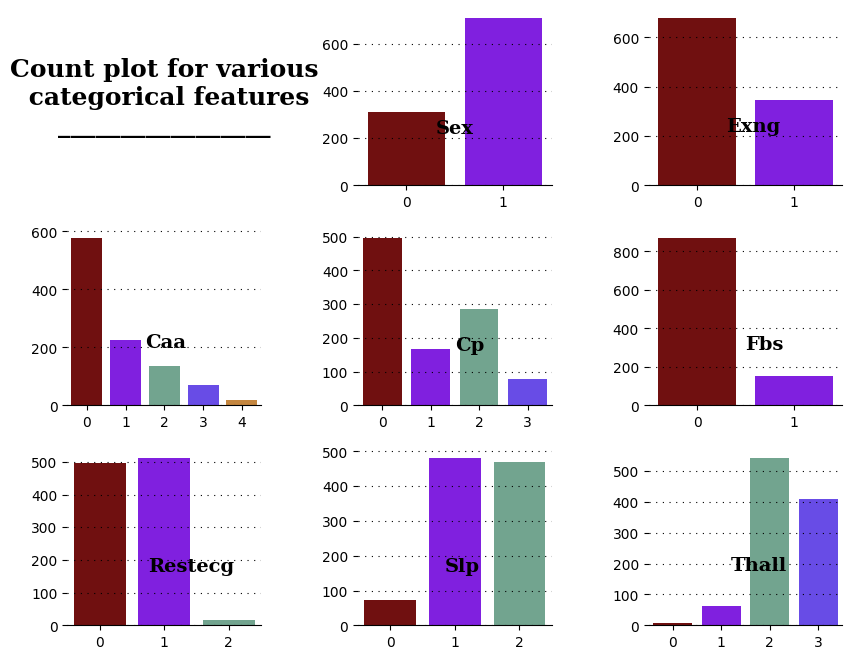

In [31]:
fig = plt.figure(figsize=(10,8))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

 Boxen plot of continuous features

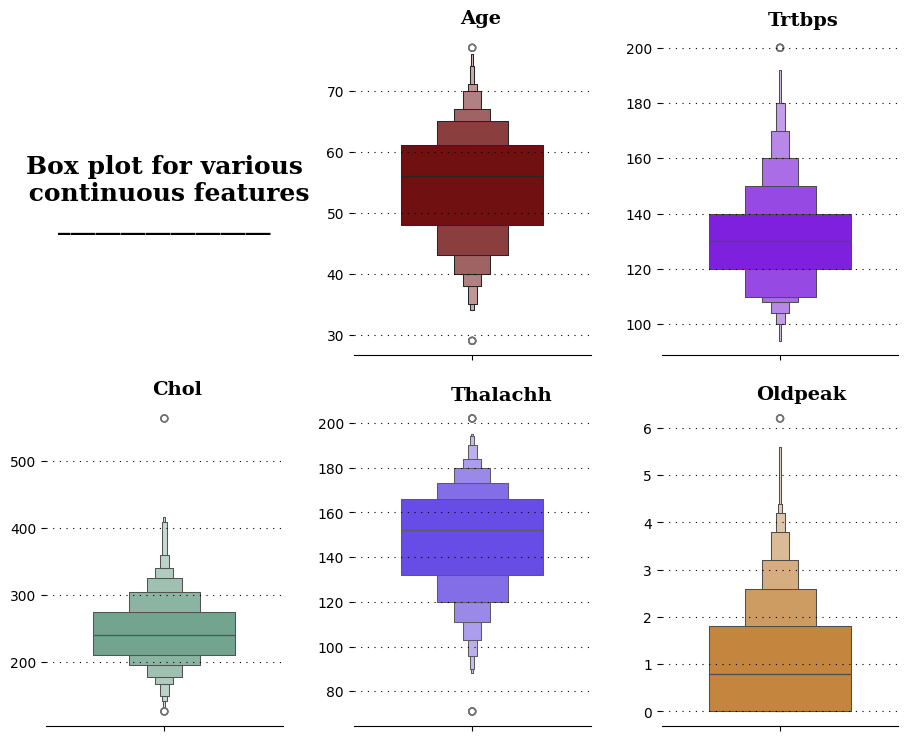

In [32]:
fig = plt.figure(figsize=(11,9))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Box plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps
ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['trtbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['thalachh'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

### Summery Statistics

In [33]:
df[con_cols].describe().transpose() #this table can help us to read the box plot

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trtbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalachh,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


# Bivariate Analysis

## Correlation Matrix

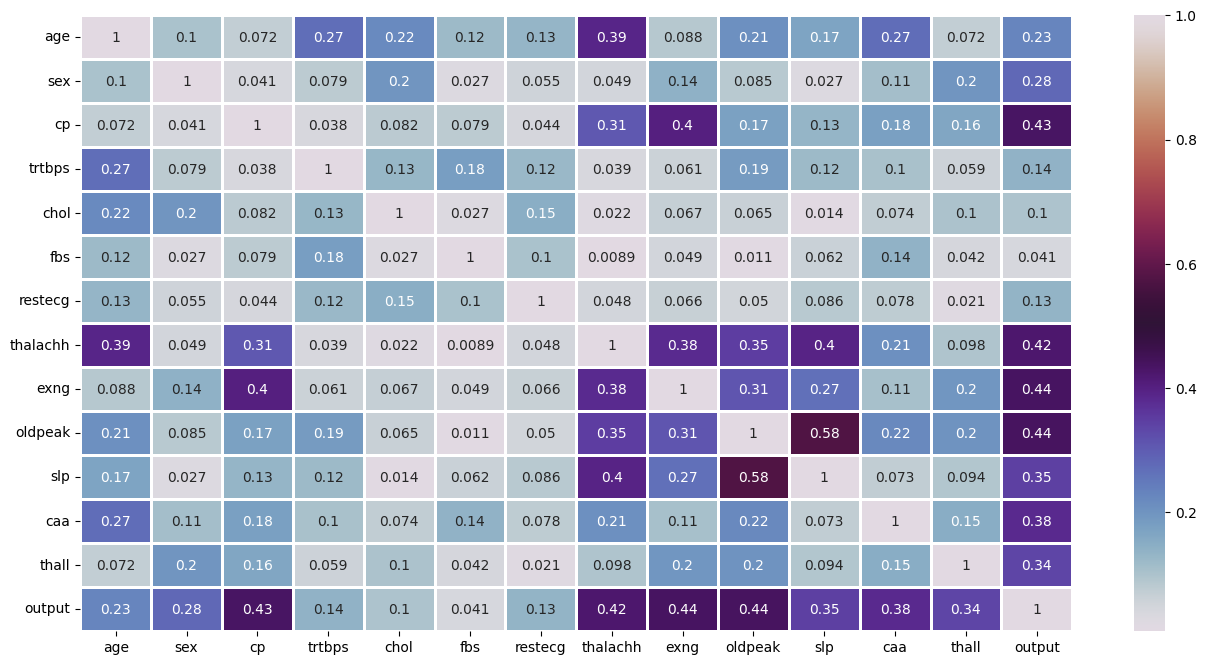

oldpeak     0.438441
exng        0.438029
cp          0.434854
thalachh    0.422895
caa         0.382085
slp         0.345512
thall       0.337838
sex         0.279501
age         0.229324
trtbps      0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: output, dtype: float64


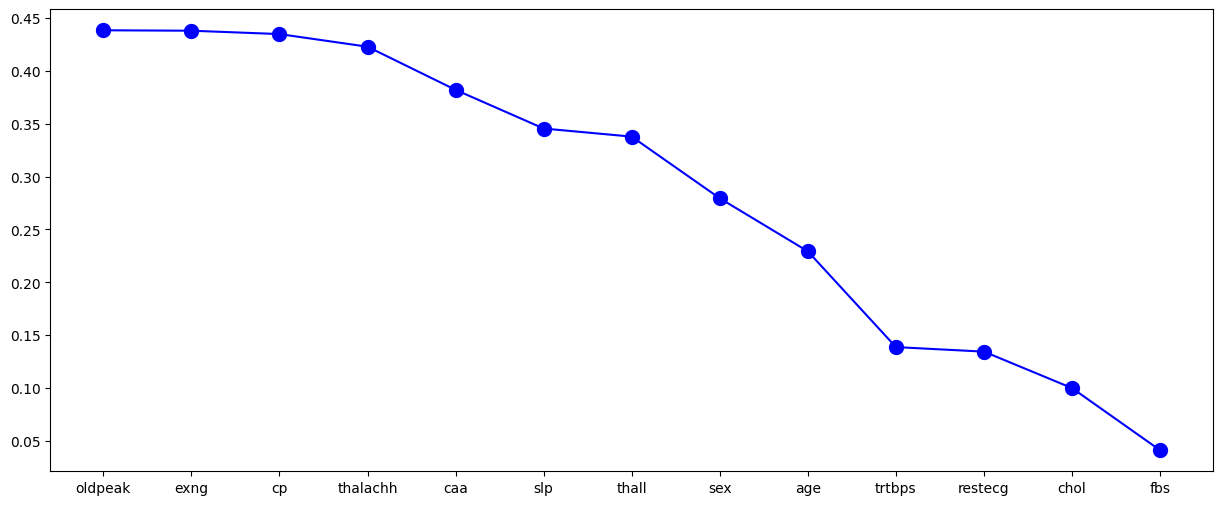

In [34]:
new_df=df
plt.figure(figsize=(16,8))
corr=new_df.corr()
sns.heatmap(abs(corr),lw=1,annot=True,cmap="twilight")
plt.show()

C=abs(corr["output"]).sort_values(ascending=False)[1:]
print(C)
plt.figure(figsize=(15,6))
plt.plot(C.index,C,color="blue")
plt.scatter(C.index,C,color="blue",lw=5)
plt.show()

### Normalization

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
#Scale Data
scaler = MinMaxScaler()
X=MinMaxScaler().fit_transform(X.values)
X = pd.DataFrame(X)
X.columns=(df.drop(['output'], axis= 1)).columns

In [37]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,0.529878,0.189006,0.0,0.395833,0.562500,0.666667,1.0
sex,1025.0,0.695610,0.460373,0.0,0.000000,1.000000,1.000000,1.0
cp,1025.0,0.314146,0.343214,0.0,0.000000,0.333333,0.666667,1.0
trtbps,1025.0,0.354827,0.165252,0.0,0.245283,0.339623,0.433962,1.0
chol,1025.0,0.273973,0.117791,0.0,0.194064,0.260274,0.340183,1.0
fbs,1025.0,0.149268,0.356527,0.0,0.000000,0.000000,0.000000,1.0
restecg,1025.0,0.264878,0.263939,0.0,0.000000,0.500000,0.500000,1.0
thalachh,1025.0,0.596291,0.175616,0.0,0.465649,0.618321,0.725191,1.0
exng,1025.0,0.336585,0.472772,0.0,0.000000,0.000000,1.000000,1.0
oldpeak,1025.0,0.172825,0.189525,0.0,0.000000,0.129032,0.290323,1.0


In [38]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667


## Splitting the dataset

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)
print("Training target distribution:\n", y_train.value_counts(normalize=True))
print("Test target distribution:\n", y_test.value_counts(normalize=True))

The shape of X_train is       (820, 13)
The shape of X_test is        (205, 13)
The shape of y_train is       (820, 1)
The shape of y_test is        (205, 1)
Training target distribution:
 output
1         0.515854
0         0.484146
Name: proportion, dtype: float64
Test target distribution:
 output
1         0.502439
0         0.497561
Name: proportion, dtype: float64


## Grid Search, Forward Feature Selection

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# Prompt the user to choose the evaluation metric
metric = input("Choose the evaluation metric (accuracy, precision, recall, f1, mse): ")

# Define the hyperparameters to search over for each model
param_grid = {
    "Decision Tree": {"max_depth": [1, 2, 3, 4, 5]},
    "Random Forest": {"n_estimators": [50, 100, 150], "max_depth": [1, 2, 3, 4, 5]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf", "poly"]},
    "Logistic Regression": {"C": [0.1, 1, 10]},
    "Gradient Boosting": {"n_estimators": [50, 100, 150], "max_depth": [1, 2, 3, 4, 5]},
    "KNN": {"n_neighbors": [3, 5, 7, 9]},
    "Naive Bayes": {"alpha": [0.1, 1, 10]}
}

# Create a feature selector using forward selection and cross-validation
feature_selector = SequentialFeatureSelector(LogisticRegression(),
                                              n_features_to_select="auto",
                                              direction="forward",
                                              scoring=metric,
                                              cv=5)

# Fit the feature selector to the training data
feature_selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[feature_selector.get_support()]

# Print the selected features
print("Selected Features:", selected_features)

# Train and evaluate each model with hyperparameter tuning using GridSearchCV and RandomizedSearchCV
models = {
    "Decision Tree": GridSearchCV(DecisionTreeClassifier(), param_grid["Decision Tree"], scoring=metric),
    "Random Forest": RandomizedSearchCV(RandomForestClassifier(), param_grid["Random Forest"], scoring=metric, n_iter=10),
    "SVM": RandomizedSearchCV(SVC(), param_grid["SVM"], scoring=metric, n_iter=10),
    "Logistic Regression": GridSearchCV(LogisticRegression(), param_grid["Logistic Regression"], scoring=metric),
    "Gradient Boosting": RandomizedSearchCV(GradientBoostingClassifier(), param_grid["Gradient Boosting"], scoring=metric, n_iter=10),
    "KNN": GridSearchCV(KNeighborsClassifier(), param_grid["KNN"], scoring=metric),
    "Naive Bayes": GridSearchCV(GaussianNB(), {}, scoring=metric)
}
# Train and evaluate each model with hyperparameter tuning using GridSearchCV
for model_name, model in models.items():
    model.fit(X_train[selected_features], y_train)

# Determine the best model based on the mean score across all folds
best_model = max(models, key=lambda x: models[x].best_score_)

# Evaluate the best model on the training set
y_train_pred = models[best_model].predict(X_train[selected_features])

if metric == 'accuracy':
    train_score = accuracy_score(y_train, y_train_pred)
elif metric == 'precision':
    train_score = precision_score(y_train, y_train_pred)
elif metric == 'recall':
    train_score = recall_score(y_train, y_train_pred)
elif metric == 'f1':
    train_score = f1_score(y_train, y_train_pred)
elif metric == 'mse':
    train_score = mean_squared_error(y_train, y_train_pred)

# Evaluate the best model on the test set
y_pred = models[best_model].predict(X_test[selected_features])

if metric == 'accuracy':
    score = accuracy_score(y_test, y_pred)
elif metric == 'precision':
    score = precision_score(y_test, y_pred)
elif metric == 'recall':
    score = recall_score(y_test, y_pred)
elif metric == 'f1':
    score = f1_score(y_test, y_pred)
elif metric == 'mse':
    score = mean_squared_error(y_test, y_pred)

# Print the evaluation results for the best model
print("Best Model:", best_model)
print("Best Model Hyperparameters:", models[best_model].best_params_)
print(f"{metric.capitalize()} on Training Set:", train_score)
print(f"{metric.capitalize()} on Test Set:", score)

Selected Features: Index(['sex', 'cp', 'trtbps', 'oldpeak', 'caa', 'thall'], dtype='object')
Best Model: Gradient Boosting
Best Model Hyperparameters: {'n_estimators': 150, 'max_depth': 5}
Accuracy on Training Set: 0.9890243902439024
Accuracy on Test Set: 0.9609756097560975


In [41]:
print("Best DT Hyperparameters:", models["Decision Tree"].best_params_)

Best DT Hyperparameters: {'max_depth': 5}


# Modeling

In [42]:
# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFECV


print('Packages imported...')

Packages imported...


## SVM

In [43]:
# instantiating the object
sv = SVC()

# fitting the model
sv.fit(X_train, y_train)

# calculating the predictions
y_pred = sv.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Support Vector Machine is ", accuracy_score(y_test, y_pred))
a_SVC = round(accuracy_score(y_test, y_pred) * 100,2)
f_SVC = round(f1_score(y_test, y_pred) * 100,2) #87.08
p_SVC = round(precision_score(y_test, y_pred) * 100,2) #85.85
r_SVC = round(recall_score(y_test, y_pred) * 100,2) #88.35

The test accuracy score of Support Vector Machine is  0.8682926829268293


## Logistic Regression

In [44]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))
a_Logistic_Regression = round(accuracy_score(y_test, y_pred) * 100,2)
f_Logistic_Regression = round(f1_score(y_test, y_pred) * 100,2) #81.98
p_Logistic_Regression = round(precision_score(y_test, y_pred) * 100,2) #76.47
r_Logistic_Regression = round(recall_score(y_test, y_pred) * 100,2) #88.35


The test accuracy score of Logistric Regression is  0.8048780487804879


## Decision Tree

In [45]:
# instantiating the object
dt = DecisionTreeClassifier(max_depth = 5)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))
a_Decision_Tree = round(accuracy_score(y_test, y_pred) * 100,2)
f_Decision_Tree = round(f1_score(y_test, y_pred) * 100,2) #85.96
p_Decision_Tree = round(precision_score(y_test, y_pred) * 100,2) #95.15
r_Decision_Tree = round(recall_score(y_test, y_pred) * 100,2) #78.40

The test accuracy score of Decision Tree is  0.8439024390243902


## Random Forest

In [46]:
# instantiating the object
rf = RandomForestClassifier(n_estimators = 100, max_depth = 5)

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = rf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))
a_random_forest = round(accuracy_score(y_test, y_pred) * 100,2)
f_random_forest = round(f1_score(y_test, y_pred) * 100,2) #87.78
p_random_forest = round(precision_score(y_test, y_pred) * 100,2) #82.20
r_random_forest = round(recall_score(y_test, y_pred) * 100,2) #94.17


The test accuracy score of Random Forest is  0.8878048780487805


## K- Nearest Neighbors

In [47]:
# instantiate the classifier
k = KNeighborsClassifier()
# fitting the model
k.fit(X_train,y_train)

# predicting values
y_pred = k.predict(X_test)
print("The test accuracy score of KNN Classifier is ", accuracy_score(y_test, y_pred))
a_k_neighbors = round(accuracy_score(y_test, y_pred) * 100,2)
f_k_neighbors = round(f1_score(y_test, y_pred) * 100,2) #85.99
p_k_neighbors = round(precision_score(y_test, y_pred) * 100,2) #85.58
r_k_neighbors = round(recall_score(y_test, y_pred) * 100,2) #86.41

The test accuracy score of KNN Classifier is  0.8585365853658536


## Gradient Boost

In [48]:
# instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators = 150,max_depth=5)

# fitting the model
gbt.fit(X_train,y_train)

# predicting values
y_pred = gbt.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))
a_Gradient_Boosting = round(accuracy_score(y_test, y_pred) * 100,2)
f_Gradient_Boosting = round(f1_score(y_test, y_pred) * 100,2) #98.52
p_Gradient_Boosting = round(precision_score(y_test, y_pred) * 100,2) #100.0
r_Gradient_Boosting = round(recall_score(y_test, y_pred) * 100,2) #97.09

The test accuracy score of Gradient Boosting Classifier is  0.9853658536585366


## Naive Bayes



In [49]:
# instantiate the classifier
clf = GaussianNB()

# train the model
clf.fit(X_train, y_train)

# predict the labels of the test set
y_pred = clf.predict(X_test)

# calculate the accuracy score
print("The test accuracy score of Naive Bayes is ", accuracy_score(y_test, y_pred))
a_Naive_Bayes = round(accuracy_score(y_test, y_pred) * 100,2)
f_Naive_Bayes = round(f1_score(y_test, y_pred) * 100,2) #81.78
p_Naive_Bayes = round(precision_score(y_test, y_pred) * 100,2) #75.41
r_Naive_Bayes = round(recall_score(y_test, y_pred) * 100,2) #89.32

The test accuracy score of Naive Bayes is  0.8


# Comparison between the models

## Percentage Table

In [21]:
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix

In [50]:
models = pd.DataFrame({
    'Model': ['Gradient Boosting','Random Forest','Support Vector Machine','K-Nearest Neighbors','Decision Tree','Logistic Regression','Naive Bayes'],
    'Accuracy': [a_Gradient_Boosting, a_random_forest, a_SVC, a_k_neighbors, a_Decision_Tree, a_Logistic_Regression, a_Naive_Bayes],
    'F1-Score': [f_Gradient_Boosting, f_random_forest, f_SVC, f_k_neighbors, f_Decision_Tree, f_Logistic_Regression, f_Naive_Bayes ],
    'Precision': [p_Gradient_Boosting, p_random_forest, p_SVC, p_k_neighbors, p_Decision_Tree, p_Logistic_Regression, p_Naive_Bayes ],
    'Recall': [r_Gradient_Boosting, r_random_forest, r_SVC, r_k_neighbors, r_Decision_Tree, r_Logistic_Regression, r_Naive_Bayes ]
             })

models.sort_values(by='Accuracy', ascending=False)


# dispalying total result
models

,Model,Accuracy,F1-Score,Precision,Recall
0,Gradient Boosting,98.54,98.52,100.00,97.09
1,Random Forest,88.78,89.59,83.90,96.12
2,Support Vector Machine,86.83,87.08,85.85,88.35
3,K-Nearest Neighbors,85.85,85.99,85.58,86.41
4,Decision Tree,84.39,85.96,78.40,95.15
5,Logistic Regression,80.49,81.98,76.47,88.35
6,Naive Bayes,80.00,81.78,75.41,89.32


<Axes: xlabel='Accuracy', ylabel='Model'>

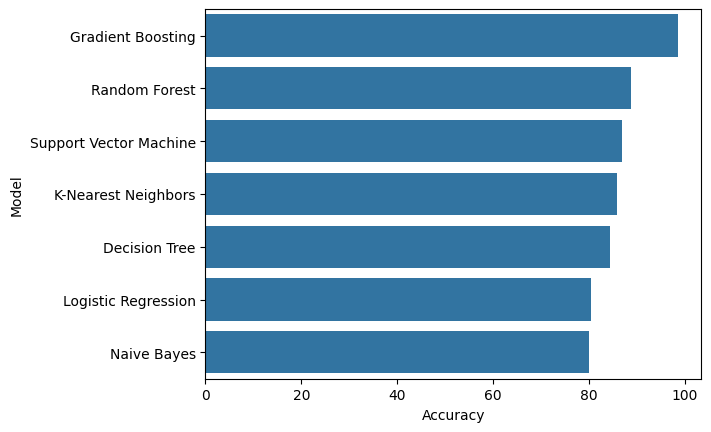

In [51]:
sns.barplot(x='Accuracy', y='Model', data=models)

# Learning Curve

## Gradient Boosting

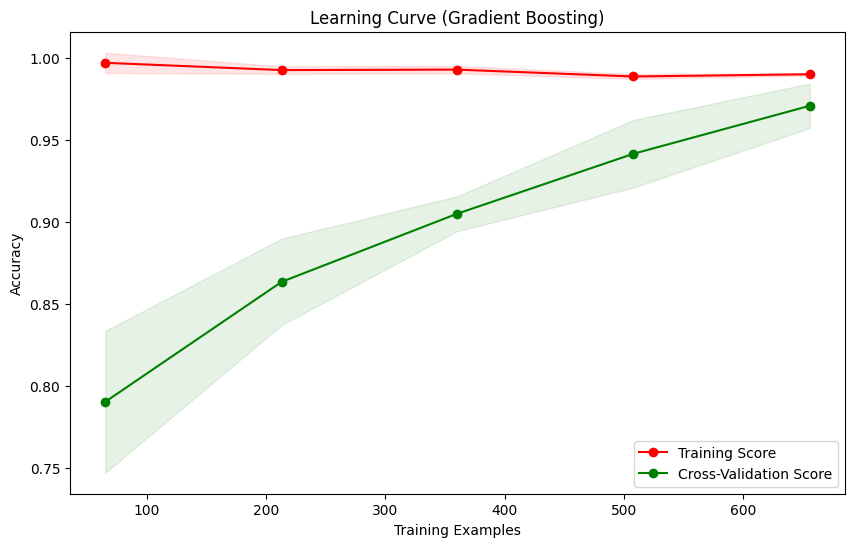

In [52]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=5)

# Plot the learning curve for the Gradient Boosting model
train_sizes, train_scores, test_scores = learning_curve(gb, X_train[selected_features], y_train, cv=5, scoring=metric)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.title("Learning Curve (Gradient Boosting)")
plt.xlabel("Training Examples")
plt.ylabel(metric.capitalize())
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()

In [ ]:
import pickle 

pickle.dump(gbt,open("final_model.pickle", "wb"))